In [92]:
import networkx as nx
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import ndlib.models.ModelConfig as mc
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [27]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)  # Fertőzés paraméter
config.add_model_parameter('gamma', 0.01) # Gyógyulás paraméter
config.add_model_parameter("fraction_infected", 0.05)

In [29]:
def epmodel(g, itera):
    model=ep.SIRModel(g)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(itera)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot(width=400, height=400)
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot(width=400, height=400)
    vm = MultiPlot()
    vm.add_plot(p)
    vm.add_plot(p2)
    m = vm.plot()
    output_notebook()
    return show(m)

Erdős Rényi

In [30]:
g = nx.erdos_renyi_graph(1000,0.1)
epmodel(g, 300)

Loading BokehJS ...

Skálamentes

In [31]:
y = nx.barabasi_albert_graph(2000, 80)
epmodel(y, 300)

Loading BokehJS ...

Klaszterezett

In [53]:
z = nx.powerlaw_cluster_graph(2000, 80, 1)
epmodel(z, 300)

Loading BokehJS ...

Közösségek

In [58]:
print("200 fős közösségek: \nEgy közösségen belül 50% az élek valószínűsége \nKlaszterek között 1% az élek valószínűsége")
print("-----------------------")
x0 = nx.gaussian_random_partition_graph(2000, 200, 400, 0.5, 0.01, seed=1234)
epmodel(x0, 450)
print("50 fős közösségek: \nEgy közösségen belül 50% az élek valószínűsége \nKlaszterek között 1% az élek valószínűsége")
print("-----------------------")
x = nx.gaussian_random_partition_graph(2000, 50, 100, 0.5, 0.01, seed=1234)
epmodel(x, 450)
print("5 fős közösségek: \nEgy közösségen belül 50% az élek valószínűsége \nKlaszterek között 1% az élek valószínűsége")
print("-----------------------")
x1 = nx.gaussian_random_partition_graph(2000, 5, 10, 0.5, 0.01, seed=1234)
epmodel(x1, 800)

200 fős közösségek: 
Egy közösségen belül 50% az élek valószínűsége 
Klaszterek között 1% az élek valószínűsége
-----------------------


Loading BokehJS ...

50 fős közösségek: 
Egy közösségen belül 50% az élek valószínűsége 
Klaszterek között 1% az élek valószínűsége
-----------------------


Loading BokehJS ...

5 fős közösségek: 
Egy közösségen belül 50% az élek valószínűsége 
Klaszterek között 1% az élek valószínűsége
-----------------------


Loading BokehJS ...

Vizualizációk:

In [69]:
viz0=nx.gaussian_random_partition_graph(400, 10, 1, 0.3, 0.0005, seed=1234)
G=Network(height="800px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
G.barnes_hut()
G.from_nx(viz0)
neighbor_map=G.get_adj_list()
neighbor_map
for node in G.nodes:
    node["value"]=len(neighbor_map[node["id"]])
G.show("NagyKözösségek.html")

In [67]:
viz1=nx.gaussian_random_partition_graph(200, 10, 1, 0.5, 0.0007, seed=1234)
G=Network(height="800px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
G.barnes_hut()
G.from_nx(viz1)
neighbor_map=G.get_adj_list()
neighbor_map
for node in G.nodes:
    node["value"]=len(neighbor_map[node["id"]])
G.show("KözepesKözösségek.html")

In [68]:
viz1=nx.gaussian_random_partition_graph(100, 5, 1, 0.5, 0.0007, seed=1234)
G=Network(height="800px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
G.barnes_hut()
G.from_nx(viz1)
neighbor_map=G.get_adj_list()
neighbor_map
for node in G.nodes:
    node["value"]=len(neighbor_map[node["id"]])
G.show("KisKözösségek.html")

In [389]:
jelendf=pd.read_excel("05-01-2020.xlsx")
jelendf['testrate']=jelendf['Testing_Rate']/100000
jelendf['incrate']=jelendf['Incident_Rate']/100000
jelendf['hosprate']=jelendf['Hospitalization_Rate']/100
jelendf['mortrate']=jelendf['Mortality_Rate']/100
jelendf['Population']=jelendf["People_Tested"]/jelendf['testrate']
jelendf['Removed']=((jelendf['Recovered']+jelendf['Deaths'])/jelendf["Confirmed"])


jelendf=jelendf[jelendf["ISO3"]=="USA"]

In [390]:
jelendf[jelendf['Social distancing']==1]
jelendf=jelendf[jelendf['Province_State']!="Diamond Princess"]
jelendf=jelendf[jelendf['Province_State']!="Grand Princess"].reset_index(drop=True)
jelendf

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,ISO3,Testing_Rate,Hospitalization_Rate,Social distancing,testrate,incrate,hosprate,mortrate,Population,Removed
0,Alabama,US,2020-05-02 02:32:00,32.3182,-86.9023,7294,289,0,7005,1,...,USA,1960.653006,13.819578,0.0,0.019607,0.001556,0.138196,0.039622,4.688897e+06,0.039622
1,Alaska,US,2020-05-02 02:32:00,61.3707,-152.4044,364,9,254,101,2,...,USA,3400.256629,NaN,0.0,0.034003,0.000609,NaN,0.024725,5.977490e+05,0.722527
2,Arizona,US,2020-05-02 02:32:00,33.7298,-111.4312,7969,330,1528,6111,4,...,USA,1028.738993,15.095997,1.0,0.010287,0.001095,0.150960,0.041410,7.278717e+06,0.233153
3,Arkansas,US,2020-05-02 02:32:00,34.9697,-92.3731,3337,64,1973,1300,5,...,USA,1918.713092,12.406353,NaN,0.019187,0.001289,0.124064,0.019179,2.589027e+06,0.610429
4,California,US,2020-05-02 02:32:00,36.1162,-119.6816,52026,2126,0,49900,6,...,USA,1670.512760,NaN,1.0,0.016705,0.001327,NaN,0.040864,3.920862e+07,0.040864
5,Colorado,US,2020-05-02 02:32:00,39.0598,-105.3111,15793,821,2486,12486,8,...,USA,1277.437600,17.077186,0.0,0.012774,0.002787,0.170772,0.051985,5.666813e+06,0.209397
6,Connecticut,US,2020-05-02 02:32:00,41.5978,-72.7554,28764,2339,4346,22079,9,...,USA,2812.031682,26.971214,1.0,0.028120,0.008068,0.269712,0.081317,3.565287e+06,0.232409
7,Delaware,US,2020-05-02 02:32:00,39.3185,-75.5071,4918,159,1403,3356,10,...,USA,2319.350479,NaN,1.0,0.023194,0.005051,NaN,0.032330,9.737640e+05,0.317609
8,District of Columbia,US,2020-05-02 02:32:00,38.8974,-77.0268,4658,231,666,3761,11,...,USA,2994.690747,NaN,1.0,0.029947,0.006600,NaN,0.049592,7.057490e+05,0.192572
9,Florida,US,2020-05-02 02:32:00,27.7663,-81.6868,34728,1314,0,33414,12,...,USA,1896.606568,16.686823,1.0,0.018966,0.001636,0.166868,0.037837,2.123261e+07,0.037837


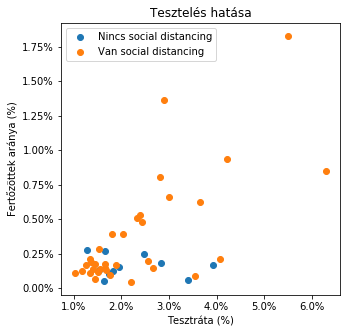

In [391]:
fig, axes = plt.subplots(1,1,figsize=(5,5))

axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.scatter(jelendf[jelendf['Social distancing']==0]['testrate']*100, jelendf[jelendf['Social distancing']==0]["incrate"]*100)
plt.scatter(jelendf[jelendf['Social distancing']==1]['testrate']*100, jelendf[jelendf['Social distancing']==1]["incrate"]*100)

plt.xlabel('Tesztráta (%)')
plt.ylabel('Fertőzöttek aránya (%)')
plt.title('Tesztelés hatása')
plt.legend(["Nincs social distancing", "Van social distancing"])
plt.show()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


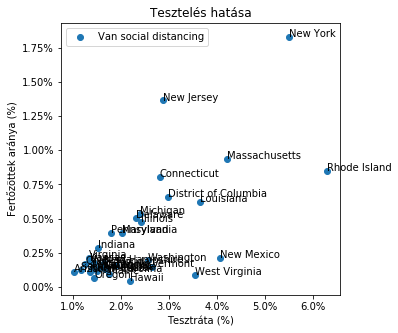

In [392]:
jelen_1=jelendf[jelendf['Social distancing']==1]
jelen_1['testrate']=jelen_1["testrate"]*100
jelen_1['incrate']=jelen_1["incrate"]*100
jelen_1=jelen_1[["Province_State","testrate","incrate"]].dropna().reset_index()

fig, axes = plt.subplots(1,1,figsize=(5,5))

axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.scatter(jelen_1['testrate'], jelen_1["incrate"])

plt.xlabel('Tesztráta (%)')
plt.ylabel('Fertőzöttek aránya (%)')
plt.title('Tesztelés hatása')
plt.legend(["Van social distancing"], loc='upper left')


for i, txt in enumerate(jelen_1['Province_State']):
    axes.annotate(txt, (jelen_1['testrate'][i], jelen_1["incrate"][i]))
    
    
plt.show()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


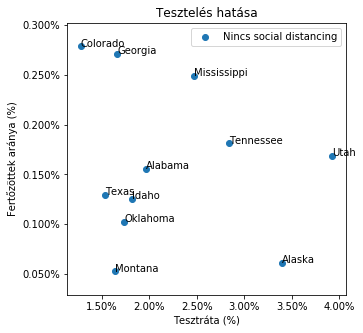

In [393]:
jelen_2=jelendf[jelendf['Social distancing']==0]
jelen_2['testrate']=jelen_2["testrate"]*100
jelen_2['incrate']=jelen_2["incrate"]*100
jelen_2=jelen_2.reset_index()

fig, axes = plt.subplots(1,1,figsize=(5,5))

axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.scatter(jelen_2['testrate'], jelen_2["incrate"])

plt.xlabel('Tesztráta (%)')
plt.ylabel('Fertőzöttek aránya (%)')
plt.title('Tesztelés hatása')
plt.legend(["Nincs social distancing"])


for i, txt in enumerate(jelen_2['Province_State']):
    axes.annotate(txt, (jelen_2['testrate'][i], jelen_2["incrate"][i]))

    
plt.show()

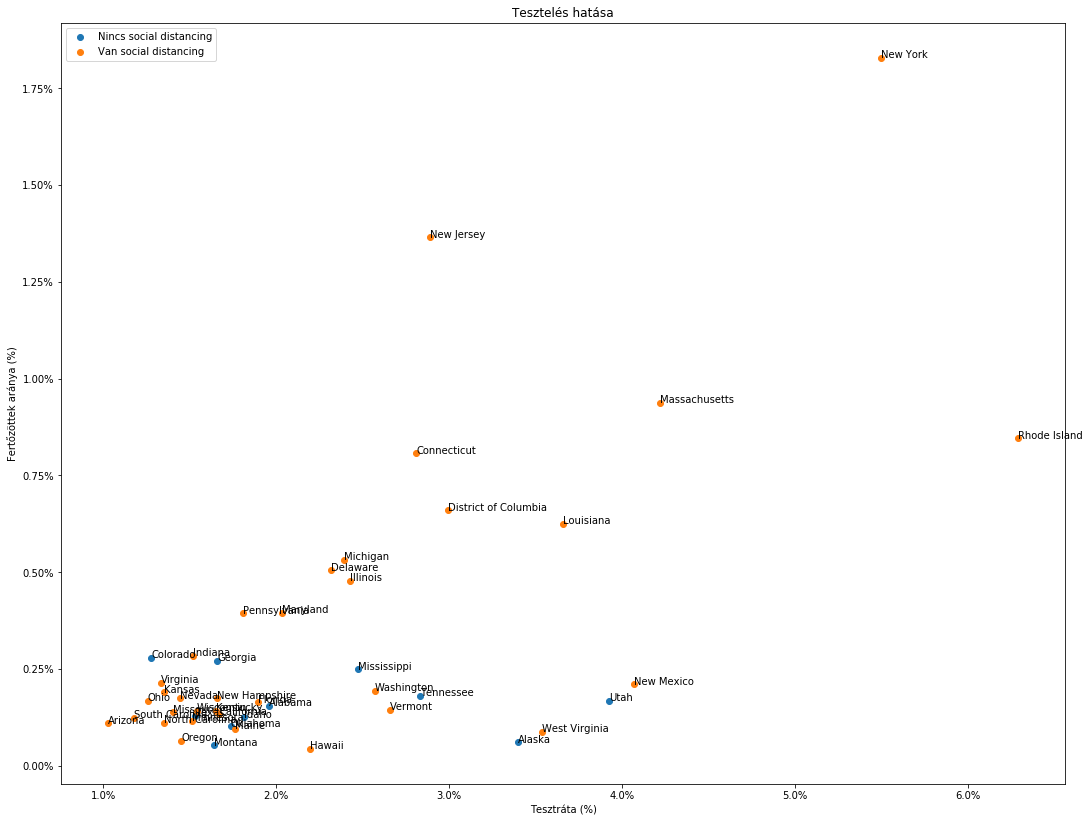

In [394]:
fig, axes = plt.subplots(1,1,figsize=(18,14))

axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.scatter(jelen_2['testrate'], jelen_2["incrate"])
plt.scatter(jelen_1['testrate'], jelen_1["incrate"])


plt.xlabel('Tesztráta (%)')
plt.ylabel('Fertőzöttek aránya (%)')
plt.title('Tesztelés hatása')
plt.legend(["Nincs social distancing","Van social distancing"], loc='upper left')


for i, txt in enumerate(jelen_2['Province_State']):
    axes.annotate(txt, (jelen_2['testrate'][i], jelen_2["incrate"][i]))
    
for i, txt in enumerate(jelen_1['Province_State']):
    axes.annotate(txt, (jelen_1['testrate'][i], jelen_1["incrate"][i]))


    
plt.show()

In [426]:
US_conf=pd.read_csv("time_series_covid19_confirmed_US.csv")
US_death=pd.read_csv("time_series_covid19_deaths_US.csv")
US_conf=US_conf[US_conf['iso3']=="USA"]
US_death=US_death[US_death['iso3']=="USA"]

In [427]:
US_conf=US_conf.groupby('Province_State').sum()
US_conf=US_conf.reset_index().drop(columns=["UID","code3","FIPS","Lat","Long_"])
US_conf=US_conf[US_conf['Province_State']!="Diamond Princess"]
US_conf=US_conf[US_conf['Province_State']!="Grand Princess"].reset_index(drop=True)
US_death=US_death.groupby('Province_State').sum()
US_death=US_death.reset_index().drop(columns=["UID","code3","FIPS","Lat","Long_"])
US_death=US_death[US_death['Province_State']!="Diamond Princess"]
US_death=US_death[US_death['Province_State']!="Grand Princess"].reset_index(drop=True)


In [428]:
US_conf['Population']=US_death['Population']
US_conf['Social distancing']=jelendf['Social distancing']
US_death['Social distancing']=jelendf['Social distancing']
for i in range(101):
    US_conf[i+1]=US_conf.iloc[:,i+1]/US_conf.loc[:,"Population"]*100
for i in range(101):
    US_death[i+1]=US_death.iloc[:,i+1]/US_death.loc[:,"Population"]*100

In [429]:
US_conf=US_conf.sort_values(by=[101]).reset_index(drop=True)
US_death=US_death.sort_values(by=[101]).reset_index(drop=True)

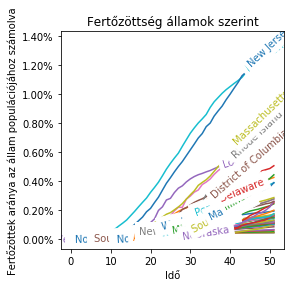

In [425]:
import numpy as np
from labellines import labelLine, labelLines
A=US_conf['Province_State']

fig, axes = plt.subplots(1,1,figsize=(4,4))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

j=0
for a in A:
    plt.plot(np.array(range(52),dtype=float), np.array(US_conf.loc[j][153:],dtype=float),label=str(a))
    j+=1

labelLines(plt.gca().get_lines(),xvals=range(51))
    

plt.xlabel('Idő')
plt.ylabel('Fertőzöttek aránya az állam populációjához számolva')
plt.title('Fertőzöttség államok szerint')

plt.show()

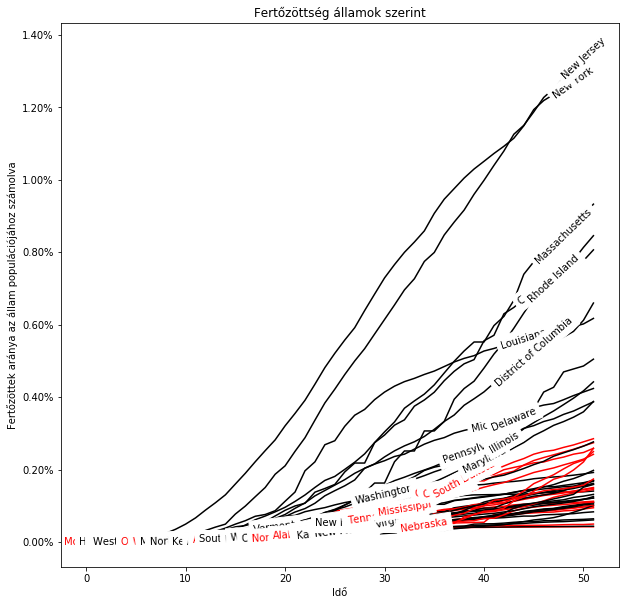

In [439]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

colors=[]
for value in US_conf['Social distancing']:
    if value==1:
        colors.append('black')
    else:
        colors.append('r')

j=0
for a in A:
    plt.plot(np.array(range(52),dtype=float), np.array(US_conf.loc[j][153:],dtype=float), color=colors[j],label=str(a))
    j+=1

labelLines(plt.gca().get_lines(),xvals=range(51))
    

plt.xlabel('Idő')
plt.ylabel('Fertőzöttek aránya az állam populációjához számolva')
plt.title('Fertőzöttség államok szerint')

plt.show()

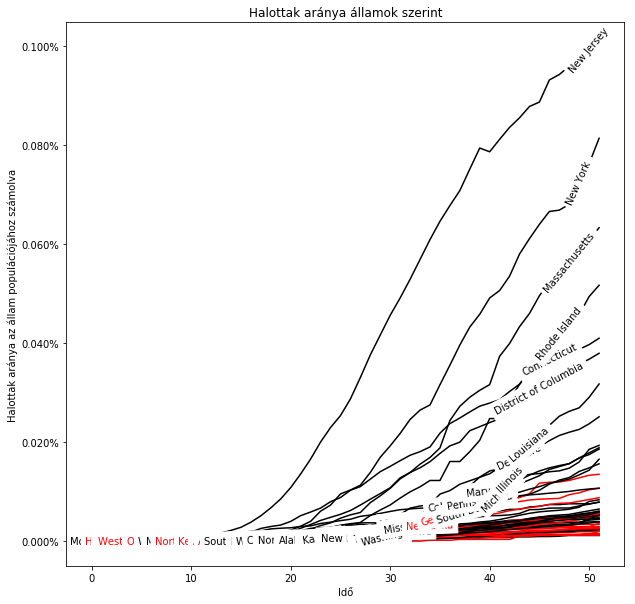

In [440]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

colors=[]
for value in US_death['Social distancing']:
    if value==1:
        colors.append('black')
    else:
        colors.append('r')

j=0
for a in A:
    plt.plot(np.array(range(52),dtype=float), np.array(US_death.loc[j][153:],dtype=float), color=colors[j],label=str(a))
    j+=1

labelLines(plt.gca().get_lines(),xvals=range(51))
    

plt.xlabel('Idő')
plt.ylabel('Halottak aránya az állam populációjához számolva')
plt.title('Halottak aránya államok szerint')

plt.show()

In [498]:
Global_conf=pd.read_csv("time_series_covid19_confirmed_global.csv")

In [499]:
Global_conf=Global_conf.groupby('Country/Region').sum().reset_index()
Global_conf=Global_conf.sort_values(by='5/1/20',ascending=False).reset_index(drop=True)
Global_conf=Global_conf[:15].reset_index(drop=True)

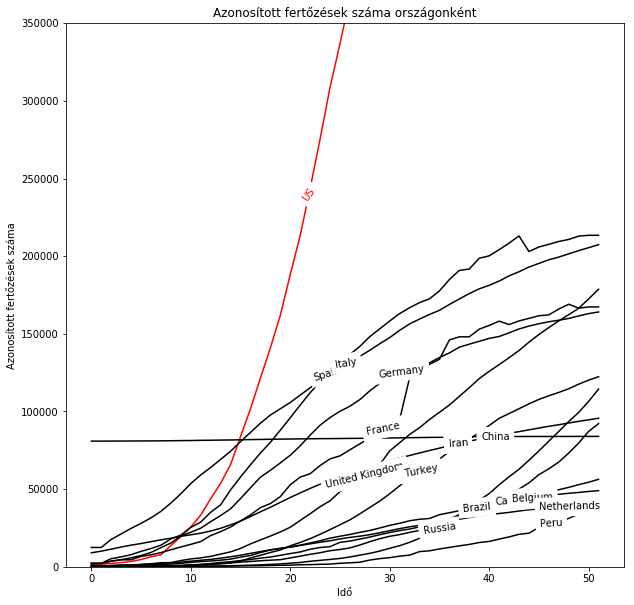

In [500]:
fig, axes = plt.subplots(1,1,figsize=(10,10))

colors=[]
for value in Global_conf['Country/Region']:
    if value=="US":
        colors.append('r')
    else:
        colors.append('black')

B=Global_conf['Country/Region']
j=0
for a in B:
    plt.plot(np.array(range(52),dtype=float), np.array(Global_conf.loc[j][-52:],dtype=float), color=colors[j],label=str(a))
    j+=1

labelLines(plt.gca().get_lines(),xvals=(20,50))
    
plt.ylim(0,350000)
plt.xlabel('Idő')
plt.ylabel('Azonosított fertőzések száma')
plt.title('Azonosított fertőzések száma országonként')

plt.show()